# 프로젝트 : 다양한 OCR모델 비교하기

# Step1. 검증용 데이터셋 준비
* 이미지는 저작권 없는 이미지사이트인  [https://unsplash.com/] 에서 가져왔습니다. 

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import cv2

import keras_ocr

from google.cloud import vision
import io

import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [14]:
images_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
file_list = os.listdir(images_dir)
file_list

['text09.jpg',
 'text14.jpg',
 'text04.jpg',
 'text08.jpg',
 'text10.jpg',
 'text05.jpg',
 'text13.jpg',
 'text02.jpg',
 'text15.jpg',
 'text07.jpg',
 'text01.jpg',
 'text12.jpg',
 'text06.jpg',
 'text11.jpg',
 'text03.jpg']

In [27]:
#import matplotlib.image as img

# image_text = []
# # for image_path in file_list:
    
# plt.figure(figsize=(18, 10))
# for i in range(15):
#     plt.subplot(3, 5, i + 1)
#     plt.imshow(file_list)
#     plt.axis('off')

import matplotlib.image as mpimg
for img in images_dir: 
  image = mpimg.imread(img)
  plt.imshow(image)
  plt.show()

IsADirectoryError: [Errno 21] Is a directory: '/'

# Step2. keras-ocr, Google OCR API, Tesseract로 테스트 진행

## 1. keras-ocr

In [28]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [29]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# image_urls = [
#   'https://source.unsplash.com/M7mu6jXlcns/640x460',
#   'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#   'https://source.unsplash.com/98uYQ-KupiE',
#   'https://source.unsplash.com/j9JoYpaJH3A',
#   'https://source.unsplash.com/eBkEJ9cH5b4',
#   'https://unsplash.com/photos/U2eUlPEKIgU',
#   'https://unsplash.com/photos/GiUJ02Yj_io',
#   'https://unsplash.com/photos/muS2RraYRuQ',
#   'https://unsplash.com/photos/ukzHlkoz1IE',
#   'https://unsplash.com/photos/tmU_LuQoCzk',
#   'https://unsplash.com/photos/XmMsdtiGSfo',
#   'https://unsplash.com/photos/JWmfUpVm8mg',
#   'https://unsplash.com/photos/iPCMZfq87oM',
#   'https://unsplash.com/photos/U9E423m3Hd8'
# ]

images = [keras_ocr.tools.read(os.path.join(images_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(images_dir, file)]) for file in file_list]

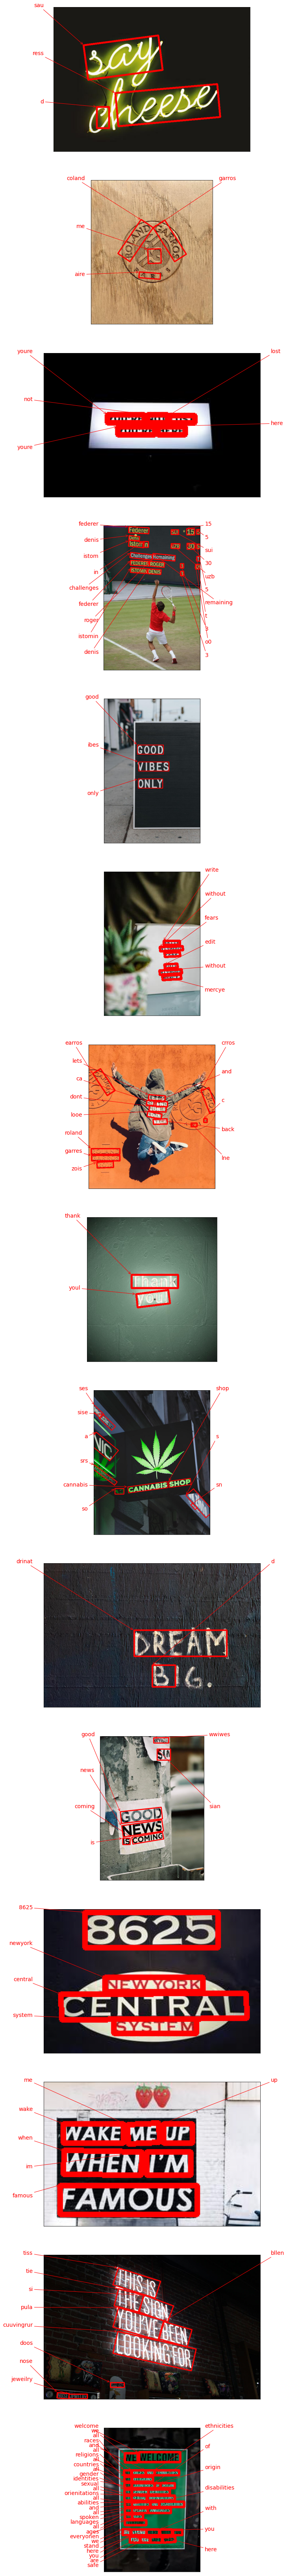

In [65]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 120))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [32]:
# fig, axs = plt.subplots(5, 3, figsize=(30, 30))
# for a in range(len(axs)):
#     for b in range(len(axs[a])):
#         keras_ocr.tools.drawAnnotations(image=images[3*a+b], 
#                                     predictions=predictions[3*a+b][0], ax=axs[a,b])

## 2. Google OCR API

In [33]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [34]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# # 입력 이미지 경로를 지정해 주세요.
# path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.jpg'

for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(images_dir, file))
    print()

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
# detect_text(path)

-rw-r--r-- 1 root root 2339 Feb 25 03:37 /aiffel/aiffel/ocr_python/my_google_api_key.json
[text09.jpg]
Texts:

"3
say
cheese
"

"3"

"say"

"cheese"
bounds: (104,275),(583,192),(616,385),(137,468)

[text14.jpg]
Texts:

"トRROR
"

"ト"

"RROR"
bounds: (480,299),(536,412),(459,450),(403,337)

[text04.jpg]
Texts:

"YOU'RE NOT LOST
YOU'RE HERE
"

"YOU'RE"

"NOT"

"LOST"

"YOU'RE"

"HERE"
bounds: (143,94),(174,94),(174,100),(143,100)

[text08.jpg]
Texts:

"Federer
SUI * 15 5
Denis
Istomin
UZB 30 5
Challenges Remaining
Ti
FEDERER ROGER
3
0OC
ISTOMIN DENIS
"

"Federer"

"SUI"

"*"

"15"

"5"

"Denis"

"Istomin"

"UZB"

"30"

"5"

"Challenges"

"Remaining"

"Ti"

"FEDERER"

"ROGER"

"3"

"0OC"

"ISTOMIN"

"DENIS"
bounds: (301,293),(382,298),(380,324),(299,319)

[text10.jpg]
Texts:

"GOOD
VIBES
ONLY
"

"GOOD"

"VIBES"

"ONLY"
bounds: (328,778),(561,778),(561,861),(328,861)

[text05.jpg]
Texts:

"WRITE
WITHOUT
FEAR.
EDIT
WITHOUT
MERCY.
"

"WRITE"

"WITHOUT"

"FEAR."

"EDIT"

"WITHOUT"

"MERCY."
bo

## 3. Tesseract

In [51]:
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/text15.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png
/aiffel/aiffel/ocr_python/image/0006.png
/aiffel/aiffel/ocr_python/image/0007.png
/aiffel/aiffel/ocr_python/image/0008.png
/aiffel/aiffel/ocr_python/image/0009.png
/aiffel/aiffel/ocr_python/image/0010.png
/aiffel/aiffel/ocr_python/image/0011.png
/aiffel/aiffel/ocr_python/image/0012.png


In [52]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

WEN {| ~ £4

|

pK


SN


:

CANNABIS

©

o)

"

|

.

Done


# Step3. 테스트 결과 정리

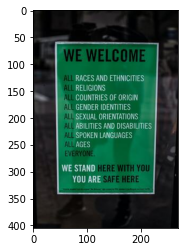

In [54]:
# 테스트 이미지 확인
test_image_path = os.getenv('HOME')+'/aiffel/ocr_python/image/text03.jpg'
img_bgr = cv2.imread(test_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
plt.imshow(img_rgb)
plt.show()

In [55]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(test_image_path)

Texts:

"WE WELCOME
ALL RACES AND ETHNICITIES
ALL RELIGIONS
ALL COUNTRIES OF ORIGIN
ALL GENDER IDENTITIES
ALL SEXUAL ORIENTATIONS
ALL ABILITIES AND DISABILITIES
ALL SPOKEN LANGUAGES
ALL AGES
EVERYONE
WE STAND HERE WITH YOU
YOU ARE SAFE HERE
"

"WE"

"WELCOME"

"ALL"

"RACES"

"AND"

"ETHNICITIES"

"ALL"

"RELIGIONS"

"ALL"

"COUNTRIES"

"OF"

"ORIGIN"

"ALL"

"GENDER"

"IDENTITIES"

"ALL"

"SEXUAL"

"ORIENTATIONS"

"ALL"

"ABILITIES"

"AND"

"DISABILITIES"

"ALL"

"SPOKEN"

"LANGUAGES"

"ALL"

"AGES"

"EVERYONE"

"WE"

"STAND"

"HERE"

"WITH"

"YOU"

"YOU"

"ARE"

"SAFE"

"HERE"
bounds: (164,305),(195,305),(195,322),(164,322)


In [56]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

WEN {| ~ £4

|

pK


SN


:

CANNABIS

©

o)

"

|

.

Done


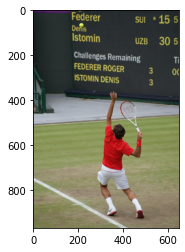

In [57]:
# 테스트 이미지 확인
test_image_path = os.getenv('HOME')+'/aiffel/ocr_python/image/text08.jpg'
img_bgr = cv2.imread(test_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
plt.imshow(img_rgb)
plt.show()

## 1. keras-ocr

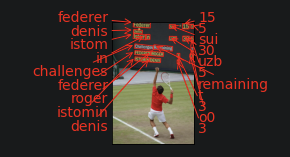

## 2. Google OCR API

In [58]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(test_image_path)

Texts:

"Federer
SUI * 15 5
Denis
Istomin
UZB 30 5
Challenges Remaining
Ti
FEDERER ROGER
3
0OC
ISTOMIN DENIS
"

"Federer"

"SUI"

"*"

"15"

"5"

"Denis"

"Istomin"

"UZB"

"30"

"5"

"Challenges"

"Remaining"

"Ti"

"FEDERER"

"ROGER"

"3"

"0OC"

"ISTOMIN"

"DENIS"
bounds: (301,293),(382,298),(380,324),(299,319)


## 3. Tesseract

In [59]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

WEN {| ~ £4

|

pK


SN


:

CANNABIS

©

o)

"

|

.

Done


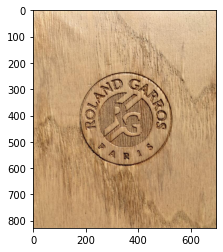

In [60]:
# 테스트 이미지 확인
test_image_path = os.getenv('HOME')+'/aiffel/ocr_python/image/text14.jpg'
img_bgr = cv2.imread(test_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
plt.imshow(img_rgb)
plt.show()

## 1. keras-ocr

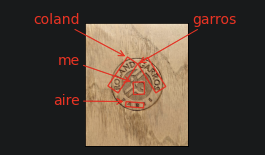

In [61]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(test_image_path)

Texts:

"トRROR
"

"ト"

"RROR"
bounds: (480,299),(536,412),(459,450),(403,337)


In [62]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

WEN {| ~ £4

|

pK


SN


:

CANNABIS

©

o)

"

|

.

Done


## Step4. 결과 분석과 결론 제시